# Image genrating from text
This notebook is based of Aleph2Image notebook, which is a combination of CLIP and DALL-E models (from OpenAi) to create new images.

In [ ]:
input_data = [
              '''In the clear nights and in the dark the morning the face of Riyadh appeared to me in the mirrors of the clouds.. its''',
'''it woke up in your clothes a thousand nights and in the gusts we bend''',
'''dream is a thousand branches of despair''',
'''place of homes and deserts''',
'''took it with her hand and we walked''',
'''from every standing sun''',
'''every shadow inclined''',
'''Kiss me like a dime.. like a wildfire''',
'''Break illusions Cup''',
'''suns planet incandescent'''
]
text_input = input_data[2]

In [ ]:

!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-96296550-8fe8-acba-3f70-8119b2429446)


In [ ]:


import torch
import numpy as np
import torchvision
import torchvision.transforms.functional as TF

import PIL
import matplotlib.pyplot as plt

import os
import random
import imageio
from IPython import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import glob

from google.colab import output

In [ ]:
# installing more dependencies and loading the model from clip
%cd /content/

!git clone https://github.com/openai/CLIP.git

%cd /content/CLIP/

!pip install ftfy

import os
import clip
import torch

clip.available_models()

import numpy as np

# Load the model
perceptor, preprocess = clip.load('ViT-B/32', jit=True)
perceptor = perceptor.eval()

/content
fatal: destination path 'CLIP' already exists and is not an empty directory.
/content/CLIP


['RN50', 'RN101', 'RN50x4', 'RN50x16', 'ViT-B/32', 'ViT-B/16']

In [ ]:
# setting image shape
im_shape = [512, 512, 3]
sideX, sideY, channels = im_shape
batch_size = 1

In [ ]:
# function to display image
def displ(img, pre_scaled=True):
  img = np.array(img)[:,:,:]
  img = np.transpose(img, (1, 2, 0))
  if not pre_scaled:
    img = scale(img, 48*4, 32*4)
  imageio.imwrite(str(3) + '.png', np.array(img))
  return display.Image(str(3)+'.png')


In [ ]:
# load the encoder model
import io
import os, sys
import requests
import PIL

import torch
import torchvision.transforms as T
import torchvision.transforms.functional as TF

!pip install git+https://github.com/openai/DALL-E.git


from dall_e import map_pixels, unmap_pixels, load_model
target_image_size = sideX


model = load_model("https://cdn.openai.com/dall-e/decoder.pkl", 'cuda')
encoder = load_model("https://cdn.openai.com/dall-e/encoder.pkl", 'cuda')

  Cloning https://github.com/openai/DALL-E.git to /tmp/pip-req-build-99prznoe
  Running command git clone -q https://github.com/openai/DALL-E.git /tmp/pip-req-build-99prznoe
     |████████████████████████████████| 64 kB 2.5 MB/s 
     |████████████████████████████████| 21.5 MB 138 kB/s 
     |████████████████████████████████| 138 kB 76.2 MB/s 
     |████████████████████████████████| 1.9 MB 79.9 MB/s 
     |████████████████████████████████| 743 kB 78.5 MB/s 
     |████████████████████████████████| 127 kB 76.6 MB/s 
  Created wheel for DALL-E: filename=DALL_E-0.1-py3-none-any.whl size=6010 sha256=7bd1689f952927f5fe38af836c753a23646c7df5ebe703f0cbda0a9d29541f2c
  Stored in directory: /tmp/pip-ephem-wheel-cache-h0_65dd9/wheels/4f/d2/6b/6b7aaca8942aea8c54dcfd507ec933e997a772377ae071f608
Successfully built DALL-E
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependenc

In [ ]:
oi = encoder(map_pixels(.2*torch.nn.functional.interpolate(torch.rand(1, 3, sideX//4, sideY//4), (sideX, sideY))).cuda())

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)


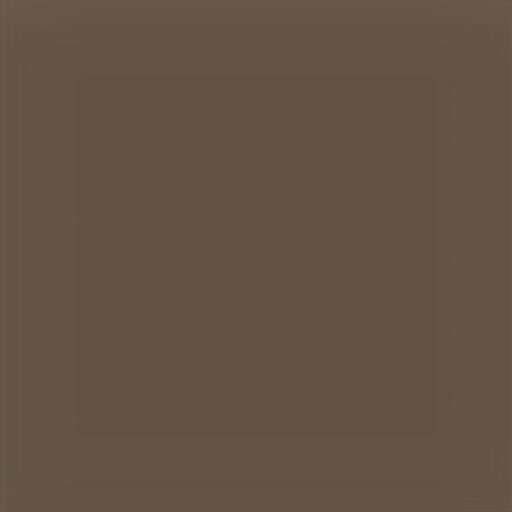

In [ ]:



class Pars(torch.nn.Module):
    def __init__(self):
        super(Pars, self).__init__()


        hots = torch.nn.functional.one_hot((torch.arange(0, 8192).to(torch.int64)), num_classes=8192)
        rng = torch.zeros(batch_size, 64*64, 8192).uniform_()**torch.zeros(batch_size, 64*64, 8192).uniform_(.1,1)
        for b in range(batch_size):
          for i in range(64**2):
            rng[b,i] = hots[[np.random.randint(8191)]]

        rng = rng.permute(0, 2, 1)

        self.normu = torch.nn.Parameter(rng.cuda().view(batch_size, 8192, 64, 64))



    def forward(self):

      
      normu = torch.softmax(hadies*self.normu.reshape(batch_size, 8192//2, -1), dim=1).view(batch_size, 8192, 64, 64)
      return normu


lats = Pars().cuda()
mapper = [lats.normu]
optimizer = torch.optim.Adam([{'params': mapper, 'lr': .05}])
eps = 0



tx = clip.tokenize(text_input)
t = perceptor.encode_text(tx.cuda()).detach().clone()


nom = torchvision.transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)



  ##########################################################
   

[0, tensor([-2.0547], device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)]  (loss)
 0


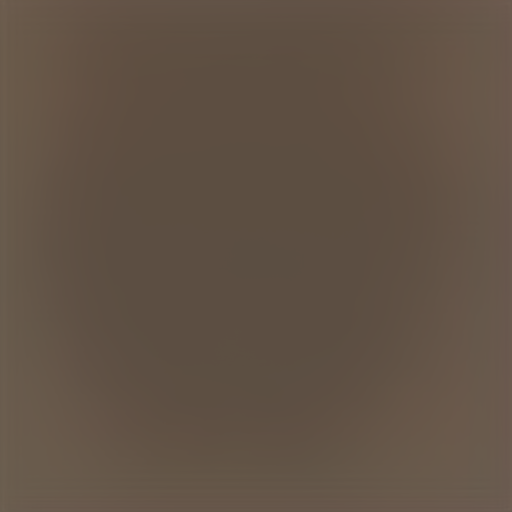




  ##########################################################
   

[0, tensor([-3.0859], device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)]  (loss)
 50


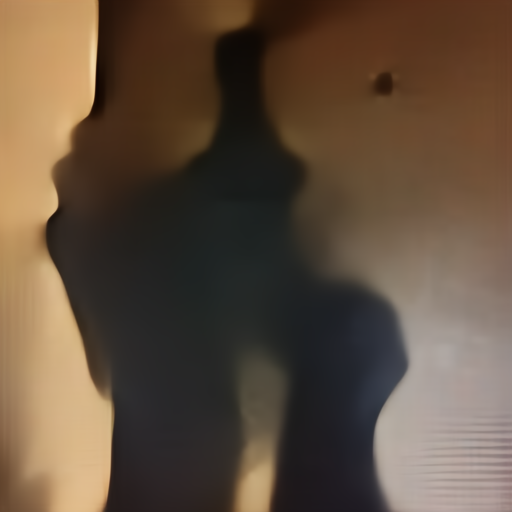




  ##########################################################
   

[0, tensor([-3.4297], device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)]  (loss)
 100


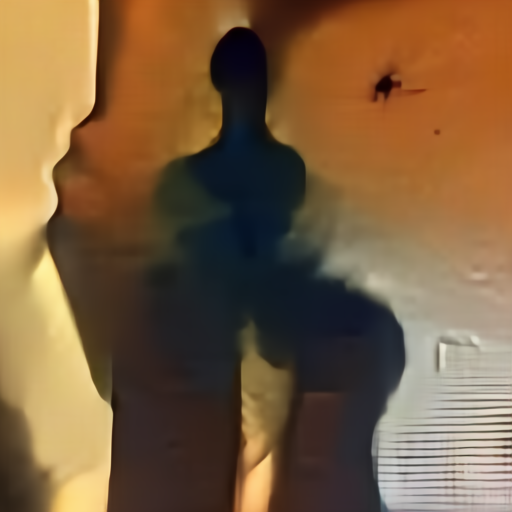

KeyboardInterrupt: ignored

In [ ]:




def checkin(loss):
  global hadies
  print('''
  ##########################################################
  ''',
        loss, ' (loss)\n',itt)
  
  with torch.no_grad():
    
    al = unmap_pixels(torch.sigmoid(model(lats())[:, :3]).cpu().float()).numpy()
    for allls in al:
      displ(allls)
      display.display(display.Image(str(3)+'.png'))
      print('\n')


def ascend_txt():
  out = unmap_pixels(torch.sigmoid(model(lats())[:, :3].float()))

  

  cutn = 64 # improves quality
  p_s = []
  for ch in range(cutn):
    size = int(sideX*torch.zeros(1,).uniform_(.8, .99))
    offsetx = torch.randint(0, sideX - size, ())
    offsety = torch.randint(0, sideX - size, ())
    apper = out[:, :, offsetx:offsetx + size, offsety:offsety + size]
    apper = torch.nn.functional.interpolate(apper, (224,224), mode='bilinear')
    p_s.append(apper)
  into = torch.cat(p_s, 0)
  

  into = into + .2 * random.random() * torch.randn_like(into)

  into = nom((into))


  iii = perceptor.encode_image(into)


  lat_l = 0



  return [lat_l, 10*-torch.cosine_similarity(t, iii).view(-1, batch_size).T.mean(1)]

def train(i):
  global hadies
  loss1 = ascend_txt()
  loss = loss1[0] + loss1[1]
  loss = loss.mean()
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  for g in optimizer.param_groups:
    g['lr'] = g['lr']*1.005
    
  
  if itt % 50 == 0:
    checkin(loss1)


itt = 0
for asatreat in range(10000):
  train(itt)
  itt+=1

